## Lead Scoring Case Study

### Problem Statement

X Education, an online education company, seeks to enhance its lead conversion process. The company generates leads through website visits, form submissions, video views, and referrals. The current lead conversion rate is 30%, and the CEO desires to increase it to around 80%. Your task is to build a logistic regression model that assigns a lead score (between 0 and 100) to each lead, aiding the identification of leads with a higher likelihood of conversion.

### Goals of the Case Study

1. **Build a Logistic Regression Model:**
   - Develop a model to assign lead scores, allowing the company to target potential leads effectively.

2. **Adaptability for Future Changes:**
   - Ensure the model can be adjusted to meet any future changes in the company's requirements.

### Steps

1. Read and Understand the Data
2. Clean the Data
3. Prepare the Data for Model Building
4. Model Building
5. Model Evaluation
6. Making Predictions on the Test Set

### Approach

1. **Read and Understand the Data:**
   - Familiarize yourself with the dataset to gain insights into lead characteristics.

2. **Clean the Data:**
   - Address missing values, handle outliers, and ensure data integrity.

3. **Prepare the Data for Model Building:**
   - Encode categorical variables, scale numerical features, and split the data into training and testing sets.

4. **Model Building:**
   - Utilize logistic regression to predict lead scores based on historical data.

5. **Model Evaluation:**
   - Assess the model's performance using relevant metrics such as accuracy, precision, recall, and F1-score.

6. **Making Predictions on the Test Set:**
   - Apply the trained model to predict lead scores for new data.

### Next Steps

1. **Model Fine-Tuning:**
   - Optimize the model parameters to improve performance.

2. **Handling Future Changes:**
   - Implement strategies to adapt the model to potential changes in lead generation or conversion processes.

3. **Continuous Monitoring:**
   - Regularly assess the model's performance and update as needed to meet evolving business requirements.

By following this structured approach, X Education aims to efficiently target leads with a higher likelihood of conversion, contributing to the company's overall goal of achieving an 80% lead conversion rate.


In [549]:
# import lib
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [550]:
# Reading data 
leads=pd.read_csv('Leads.csv')

# Data Look up 
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [551]:
# Shape Check 
leads.shape

(9240, 37)

In [552]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [553]:
# Info check 
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [554]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### Data Cleaning and Preparation

In [555]:
# Checking the number of missing values in each column
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [556]:
# Checking the number of duplicates present in each columns 
duplicates_in_columns = leads.apply(lambda x: x.duplicated().sum())

# Print the results
print(duplicates_in_columns)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                      9235
Lead Source                                      9218
Do Not Email                                     9238
Do Not Call                                      9238
Converted                                        9238
TotalVisits                                      9198
Total Time Spent on Website                      7509
Page Views Per Visit                             9125
Last Activity                                    9222
Country                                          9201
Specialization                                   9220
How did you hear about X Education               9229
What is your current occupation                  9233
What matters most to you in choosing a course    9236
Search                                           9238
Magazine                                         9239
Newspaper Article           

In [557]:
#dropping Lead Number and Prospect ID since they have all unique values

leads.drop(['Prospect ID', 'Lead Number'],axis= 1, inplace = True)

In [558]:
#data check
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [559]:
# Looking into the value counts of each columns , using loop for doing it in one go 

for i in leads:
    print('___________________________________________________')
    print(leads[i].astype('category').value_counts())
    print('___________________________________________________')
  

___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
___________________________________________________
___________________________________________________
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: count, dtype: int64
___________________________________________________
__________

In [560]:
#Replacing 'Select' values with Nan
leads=leads.replace("Select", np.nan)

In [561]:

#Checking for count of missing values in each column
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [562]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [563]:
# Dropping all the columns which have missing values more then 35%

for i in leads.columns:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 35):
        leads.drop(i, axis=1, inplace = True)

In [564]:
#checking percentage of null values again in each column
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Newspaper                                         0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Search                                            0.00
X Education Forums                                0.00
Newspaper 

In [565]:
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [566]:
# Treating null values 
leads['Lead Source'].dtype

dtype('O')

In [567]:
m1=leads['Lead Source'].mode()[0]

In [568]:
#Filling the nulls with mode 
leads['Lead Source'].fillna(m1,inplace=True)

In [569]:
#Chceking null again 
leads['Lead Source'].isnull().sum()

0

In [570]:
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Origin                                         0
Newspaper                                           0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Search                                              0
X Education Forums                                  0
Newspaper Article                                   0
Magazine                    

In [571]:
columns_with_null = leads.columns[leads.isnull().sum() > 0]
print(columns_with_null)

Index(['TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course'],
      dtype='object')


In [572]:
# Fill null values based on data type
for i in columns_with_null:
    if leads[i].dtype == 'object':

        # For object columns, fill with the mode
        m = leads[i].mode().iloc[0]
        leads[i] = leads[i].fillna(m)

    elif np.issubdtype(leads[i].dtype, np.floating):
        # For float columns, fill with median or mean
        median_value = leads[i].median()
        leads[i] = leads[i].fillna(median_value)
    else:
        # For other data types, you can add more handling logic as needed
        pass



In [573]:
# Checking the null values in columns again 
leads.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our 

##### Data Type check 

In [574]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

#### Segmentation into categorical columns and numerical columns
 

In [575]:
# Creating lists of categorical and numerical columns
cat_col = []
num_col = []

for col in leads.columns:
    if leads[col].dtype == 'object' or leads[col].dtype == 'O':
        cat_col.append(col)
    
    #As we have a target column, which is a categorical column but is numerical in nature,
    elif col == 'Converted':
        cat_col.append(col)
    else:
        num_col.append(col)

print("Categorical columns:", cat_col)
print("Numerical columns:", num_col)


Categorical columns: ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity', 'Country', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']
Numerical columns: ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


#### Analysis of Numerical Columns


In [576]:
# Importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt 

# Set Seaborn style and grid
sns.set(style='whitegrid')

##### Correlation Analysis

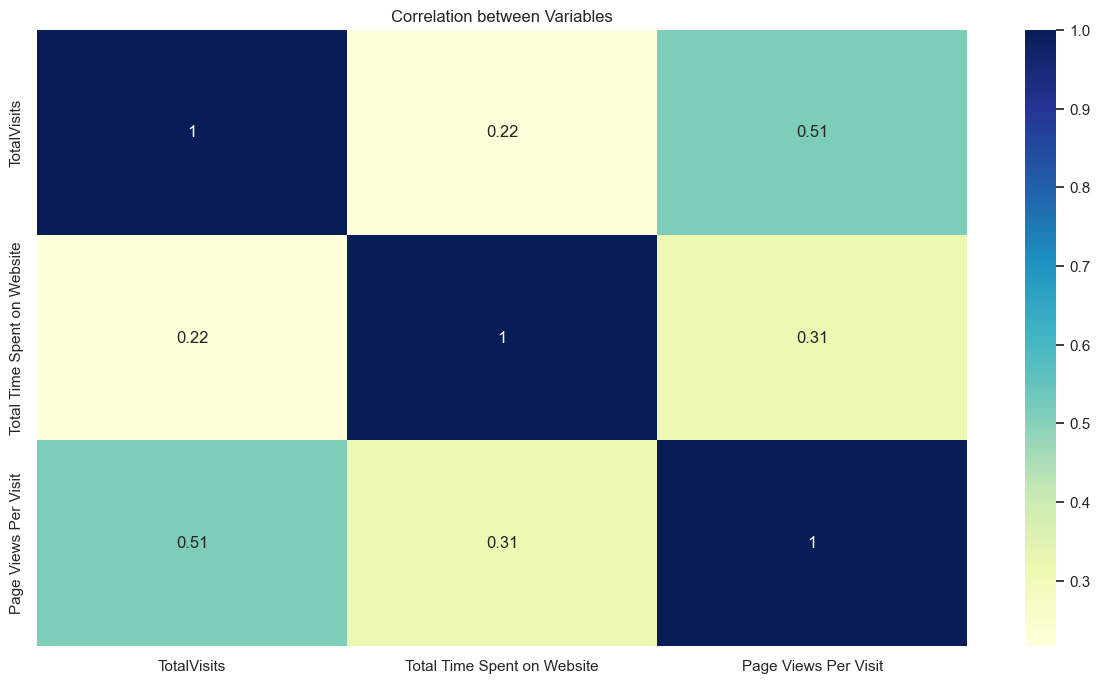

In [577]:
#Heatmap to see correlation between variables
plt.figure(figsize=(15, 8))
sns.heatmap(leads[num_col].corr() , annot = True, cmap='YlGnBu')
plt.title("Correlation between Variables")
plt.show()

##### Numeric Feature vs. Target

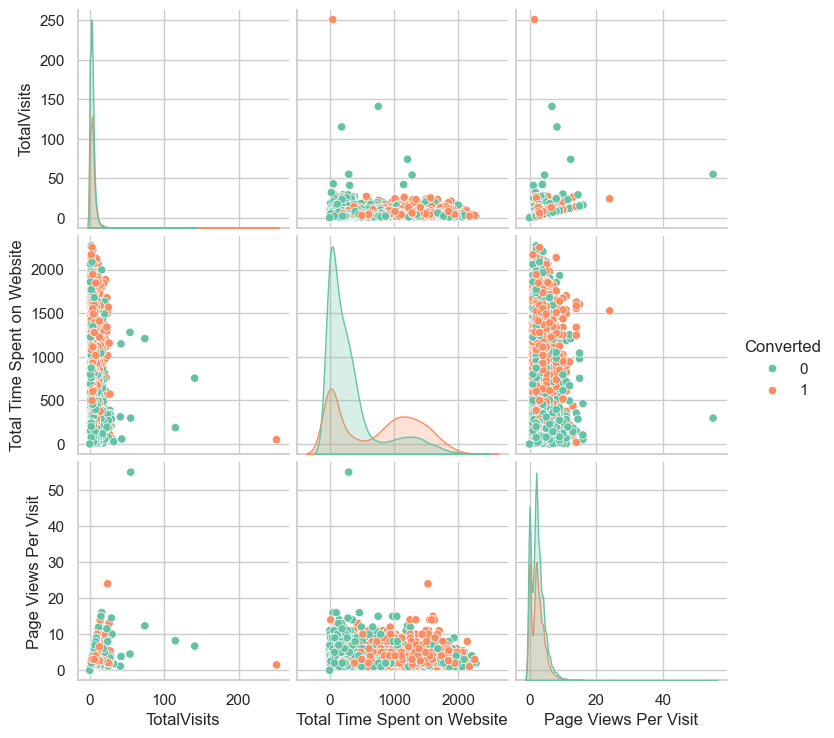

In [578]:
# Pair plot for numeric variables with hue based on 'Converted'
sns.pairplot(leads, vars=num_col, hue='Converted', palette='Set2')
plt.show()


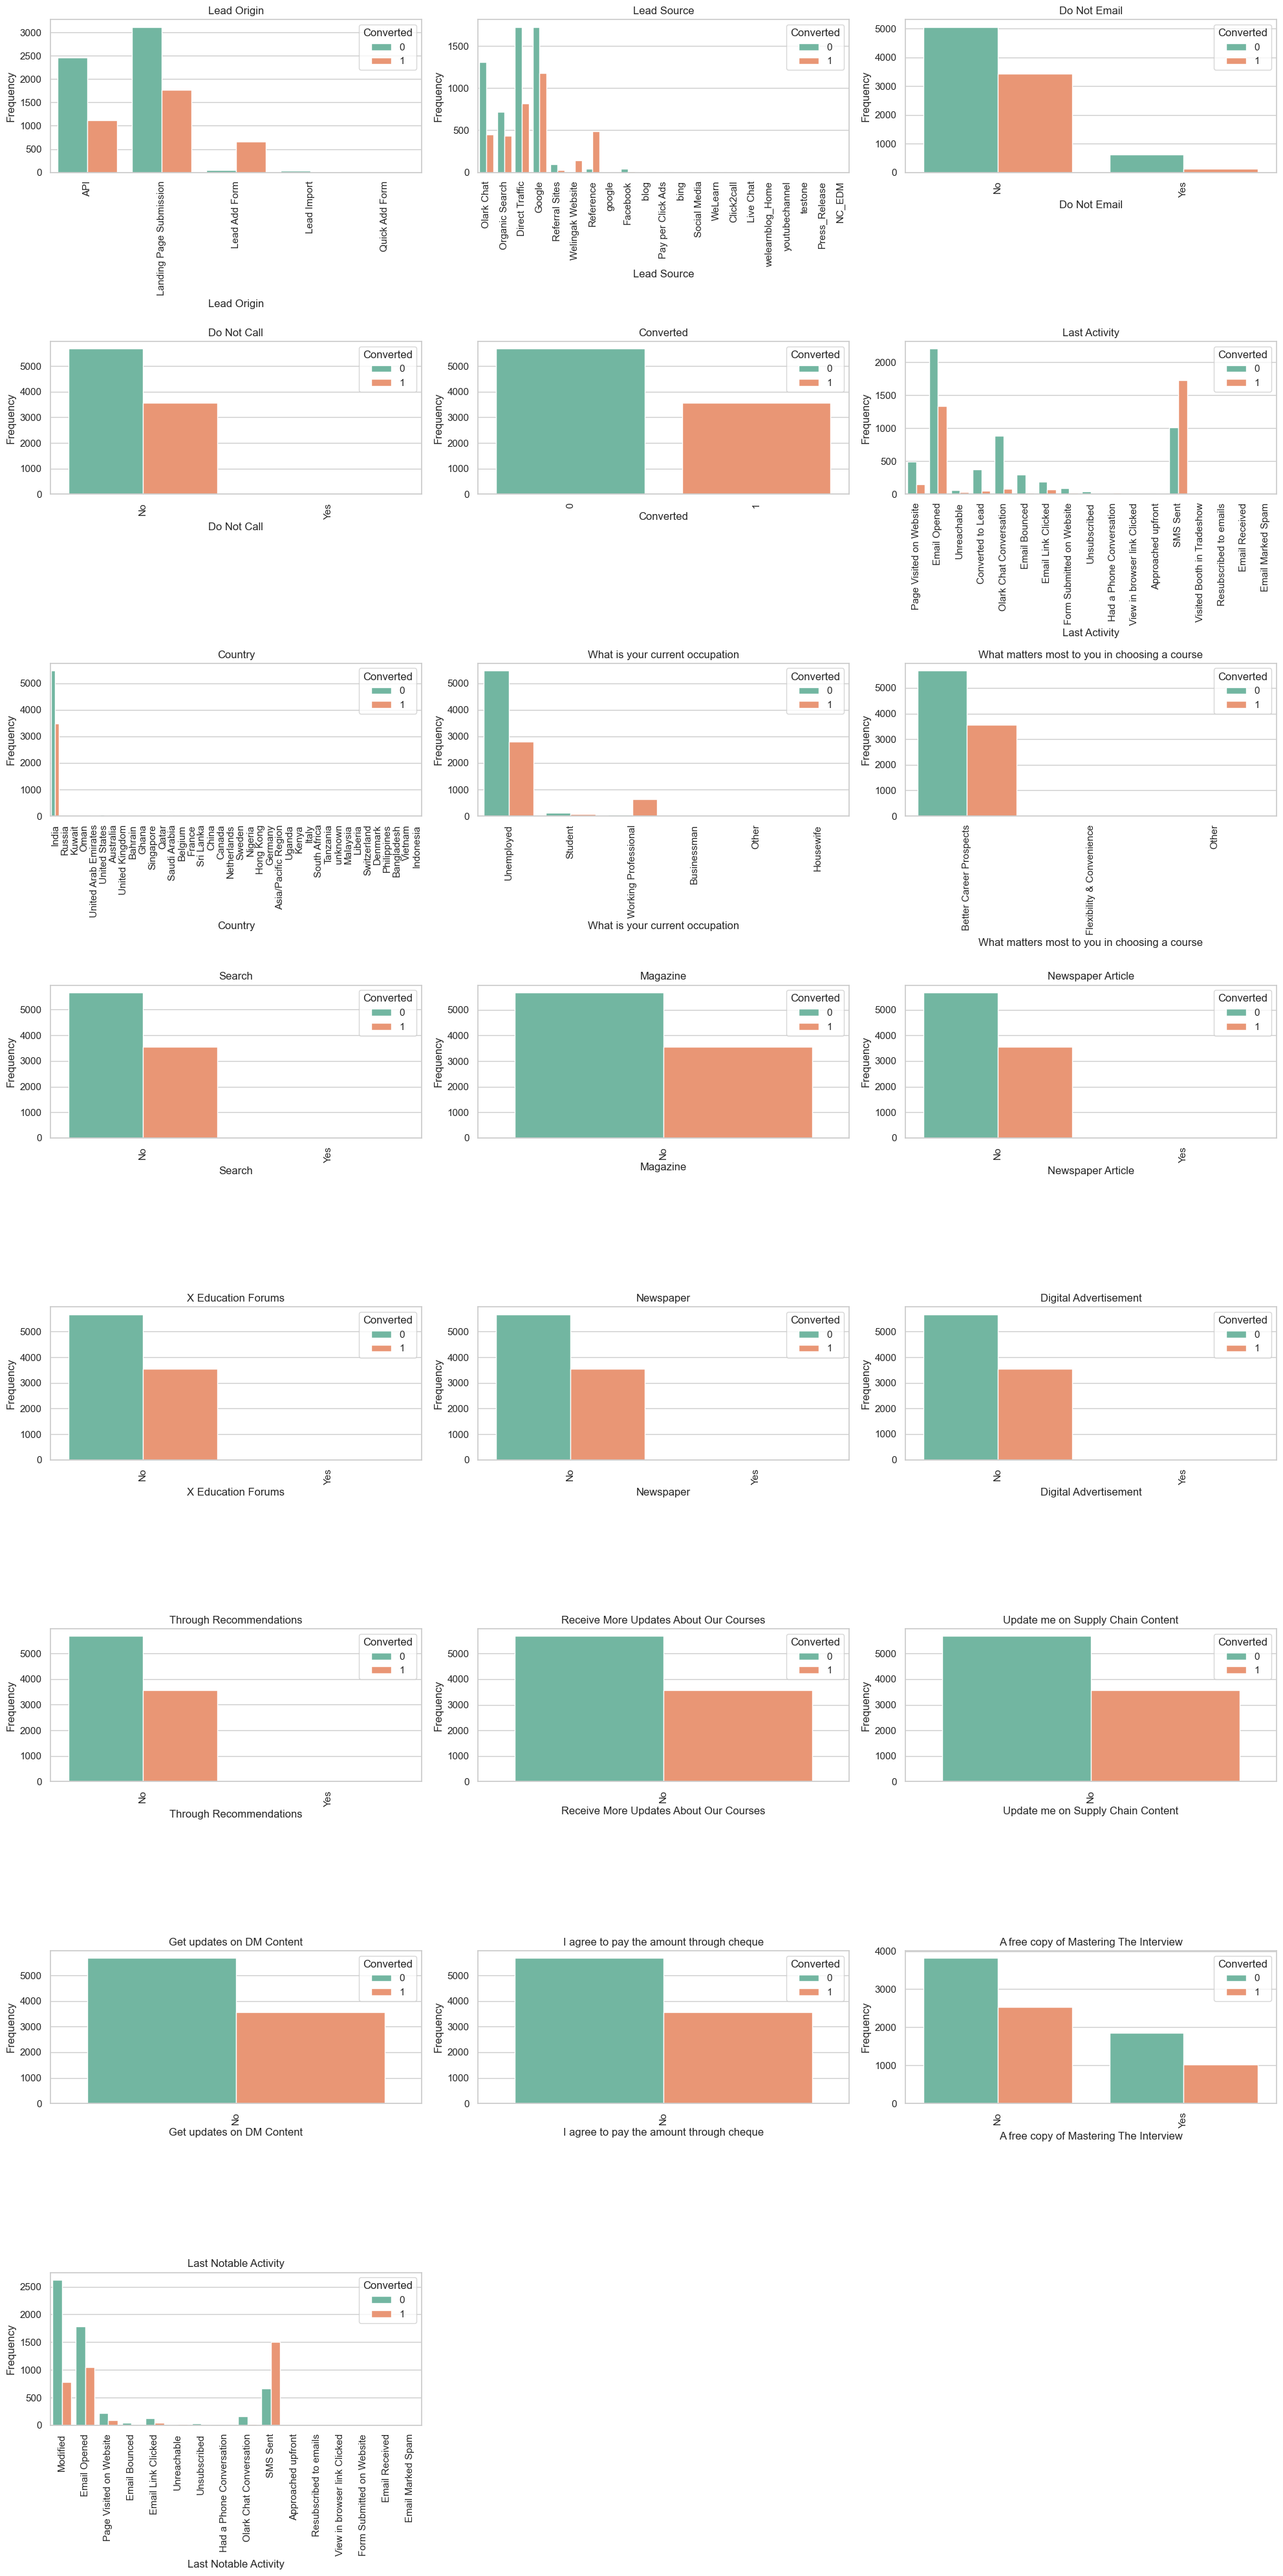

In [579]:
# Calculate the number of rows needed
num_rows = -(-len(cat_col) // 3)  # Round up division

# Initialize variables
n = 1

# Create a new figure and set its size
plt.figure(figsize=(20, 5 * num_rows))

# Iterate through categorical variables and create count plots
for i in cat_col:
    plt.subplot(num_rows, 3, n)
    sns.countplot(x=i, hue='Converted', data=leads, palette='Set2')
    plt.title(i)  # Add the variable name as the title
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')

    n += 1

    # Break the loop if we have created all the plots
    if n > len(cat_col):
        break

plt.tight_layout()
plt.show()


In [580]:
#Dropping 'Country' from the data set because we are operating in India only and there is no point in analyzing this
leads.drop('Country', axis=1, inplace=True)


In [581]:
# Since the 'Country' column will be stored in cat_col too, we will drop it from that as well.
cat_col.remove('Country')

In [582]:
# Looking into the data set again
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [583]:
leads.shape

(9240, 24)

In [584]:
# Creating dummy variables for the categorical variables and droppong the first one
binary_cols = [col for col in leads.columns if leads[col].nunique() <= 2 and leads[col].dtype == 'object']
print(binary_cols)
print(len(binary_cols))


['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']
14


In [585]:
#Creating a Map function
def fmap(x):
    return x.map({'Yes':1,'No':0})

In [586]:
# Mapping into binary values
leads[binary_cols]=leads[binary_cols].apply(fmap)

##### Creating Dummies and Concat with original dataset

We have 'binary_cols' and 'cat_col' for which we have to create dummies, and these two lists will have some common columns in them as all the 'binary_cols' created are categorical columns and will be present in them.


In [587]:
# Remove categorical columns that are already present in binary columns
cat_col = [col for col in cat_col if col not in binary_cols]

In [588]:
cat_col

['Lead Origin',
 'Lead Source',
 'Converted',
 'Last Activity',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Last Notable Activity']

In [589]:
# Removing 'Converted' column from cat_col as it aleady binary 0 and 1
cat_col.remove('Converted')

In [590]:
# Shape before dummy creation
leads.shape

(9240, 24)

In [591]:
# Creating dummies for categorical columns
cat_dummies = pd.get_dummies(leads[cat_col], drop_first=True).astype(int)

In [592]:
# Concatenating dummies with the original dataset
leads = pd.concat([leads, cat_dummies], axis=1)

In [593]:
# Dropping original categorical columns
leads = leads.drop(cat_col, axis=1)

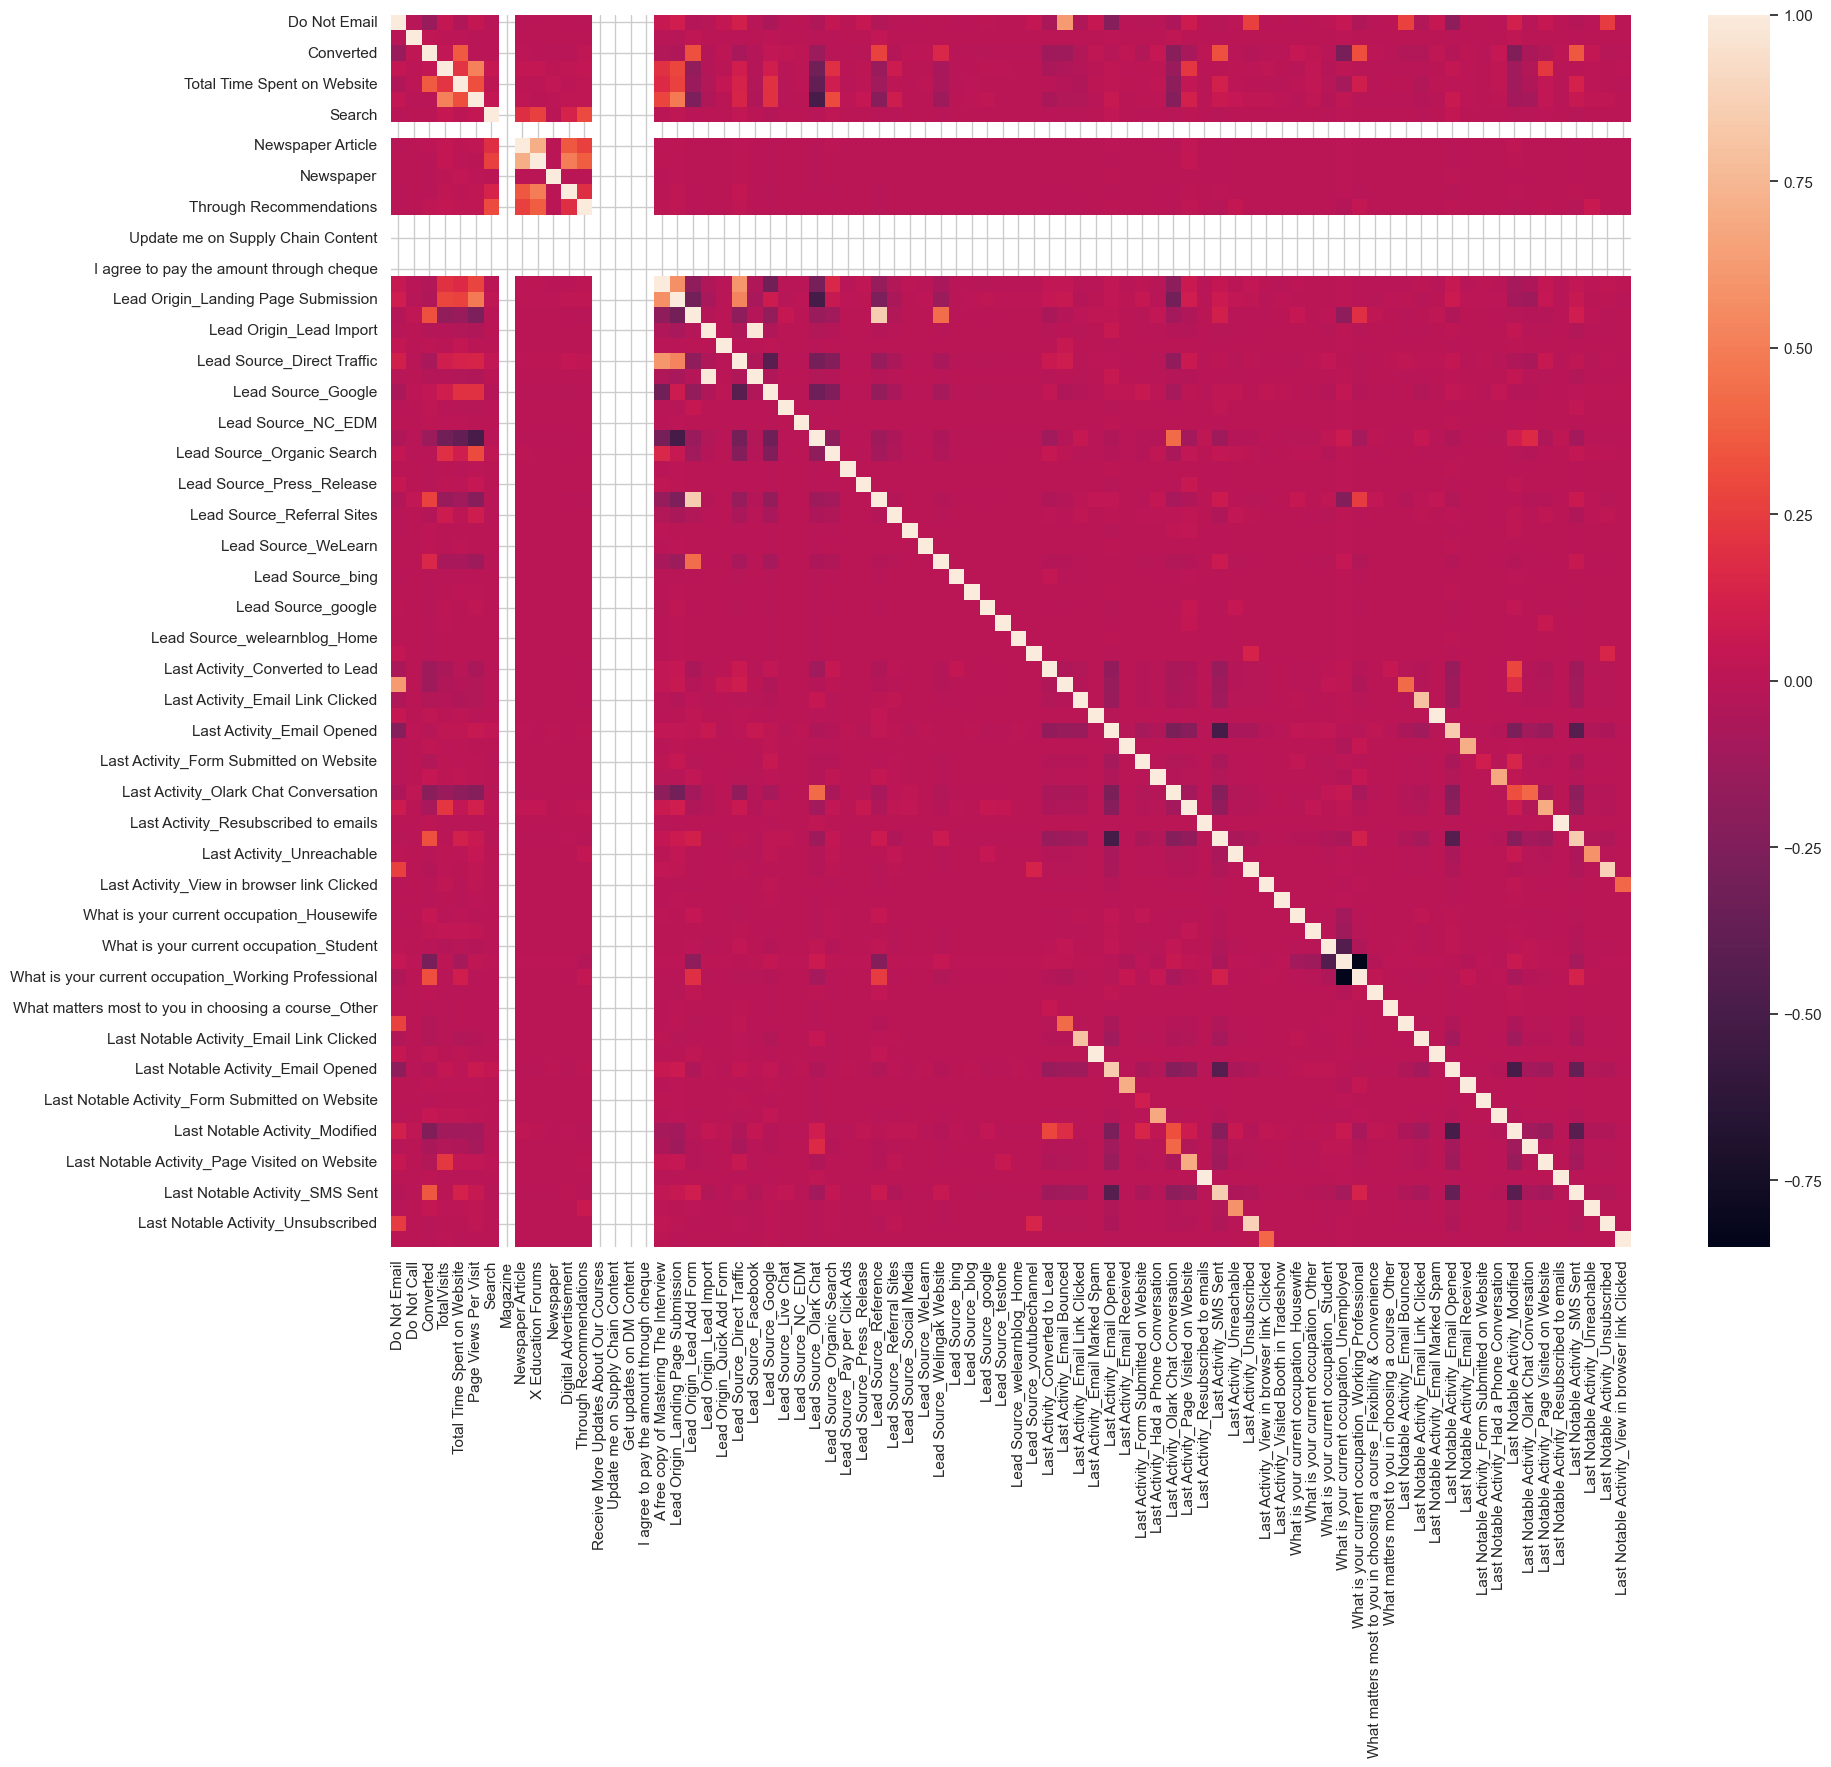

In [594]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,16)) 
sns.heatmap(leads.corr())
plt.show()

- This head map is not readable and does not give any insights. We will make a function to drop highly correlated positive or negative columns.


##### Removing Highly correlated Features

In [595]:

def remove_highly_correlated_features_inplace(data, threshold=0.7):
    # Calculate correlation matrix
    corr_matrix = data.corr().abs()

    # Select upper triangle of correlation matrix
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape, dtype=bool), k=1))

    # Find features with correlation above the threshold
    correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

    # Create dictionaries to store positively and negatively correlated features
    pos_corr_features = {}
    neg_corr_features = {}

    # Iterate through correlated features to segregate based on correlation type
    for feature in correlated_features:
        correlated_vals = upper_triangle[feature][upper_triangle[feature] > threshold]
        for col, corr_val in correlated_vals.items():
            if corr_val > 0:  # Positive correlation
                if feature not in pos_corr_features:
                    pos_corr_features[feature] = [col]
                else:
                    pos_corr_features[feature].append(col)
            elif corr_val < 0:  # Negative correlation
                if feature not in neg_corr_features:
                    neg_corr_features[feature] = [col]
                else:
                    neg_corr_features[feature].append(col)

    # Remove highly correlated features from the original DataFrame
    data.drop(correlated_features, axis=1, inplace=True)

    # Return positively and negatively correlated features
    return pos_corr_features, neg_corr_features

# Use of function
threshold = 0.7
pos_corr, neg_corr = remove_highly_correlated_features_inplace(leads, threshold)


In [596]:
# Looking into data set
leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [597]:
leads.shape

(9240, 69)

#### Splitting into train and test

In [598]:
# Importing lib
import sklearn
from sklearn.model_selection import train_test_split

In [599]:
# Creating train and test data set 

df_train , df_test =train_test_split(leads,train_size=0.7,random_state=100)
print(df_test.shape)
print(df_train.shape)

(2772, 69)
(6468, 69)


In [600]:
y_train = df_train.pop('Converted')
X_train = df_train

#### Rescaling the features

In [601]:
# Importing lib 
from sklearn.preprocessing import StandardScaler

In [602]:
scale = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()     

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
1871,0,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.100767,0.005716,-0.470569,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3516,0,0,0.290067,-0.691418,0.070401,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.290067,1.365219,1.226321,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3934,0,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [603]:
# description of num_vars
df_train[num_col].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6.468000e+03,6.468000e+03,6.468000e+03
mean,3.295653e-17,-6.701161e-17,-1.428116e-17
std,1.000077e+00,1.000077e+00,1.000077e+00
min,-6.564336e-01,-8.853708e-01,-1.085519e+00
25%,-4.671335e-01,-8.634138e-01,-6.231508e-01
50%,-8.853323e-02,-4.352528e-01,-1.607829e-01
75%,2.900670e-01,8.098906e-01,3.015850e-01
max,4.685790e+01,3.271816e+00,2.434472e+01


#### Building Model : Feature Selection

In [604]:
# Importing lib for model building 
import statsmodels.api as sm

In [605]:
logreg = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
result = logreg.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6406
Model Family:                Binomial   Df Model:                           61
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 17 Nov 2023   Deviance:                   1.4884e+05
Time:                        12:03:19   Pearson chi2:                 7.28e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    4.999e+15   3.04e+07   1.64e+08      0.000       5e+15       5e+15
Do Not Email                                                            -6.095e+14   4.42e+06  -1.38e+08      0.000   -6.09e+14   -6.09e+14
Do Not Call                                                              2.354e+15   4.75e+07   4.95e+07      0.000    2.35e+15    2.35e+15
TotalVisits                                                              6.413e+13   9.93e+05   6.46e+07      0.000    6.41e+13    6.41e+13
Total Time Spent on Website                                             -3.613e+13   9.45e+05  -3.82e+07      0.000   -3.61e+13   -3.61e+13
Page Views Per Visit                                                     2.855e+13   1.19e+06    2.4e+07      0.000    2.85e+13    2.85e+13
Search                                                                   -6.31e+14   2.18e+07  -2.89e+07      0.000   -6.31e+14   -6.31e+14
Magazine                                                                  352.3093   6.29e-07    5.6e+08      0.000     352.309     352.309
Newspaper Article                                                        3.855e+15   5.34e+07   7.22e+07      0.000    3.85e+15    3.85e+15
Newspaper                                                                -2.15e+16   6.72e+07   -3.2e+08      0.000   -2.15e+16   -2.15e+16
Digital Advertisement                                                   -9.198e+15    4.3e+07  -2.14e+08      0.000    -9.2e+15    -9.2e+15
Through Recommendations                                                   2.94e+14   2.79e+07   1.05e+07      0.000    2.94e+14    2.94e+14
Receive More Updates About Our Courses                                   -210.8966   3.84e-07  -5.49e+08      0.000    -210.897    -210.897
Update me on Supply Chain Content                                        -266.0586   4.46e-07  -5.97e+08      0.000    -266.059    -266.059
Get updates on DM Content                                                -249.7987   3.74e-07  -6.67e+08      0.000    -249.799    -249.799
I agree to pay the amount through cheque                                   15.3274   1.24e-07   1.23e+08      0.000      15.327      15.327
A free copy of Mastering The Interview                                   1.002e+14   2.59e+06   3.87e+07      0.000       1e+14       1e+14
Lead Origin_Landing Page Submission                                     -2.126e+14   2.65e+06  -8.02e+07      0.000   -2.13e+14   -2.13e+14
Lead Origin_Lead Add Form                                                9.449e+13   1.25e+07   7.54e+06      0.000    9.45e+13    9.45e+13
Lea

#### Feature Selection Using RFE

In [606]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [607]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15) 
rfe = rfe.fit(X_train, y_train)

In [608]:
rfe.support_

array([ True,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
       False,  True,  True,  True, False, False, False, False,  True,
        True, False, False,  True, False])

In [609]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 40),
 ('Search', False, 28),
 ('Magazine', False, 48),
 ('Newspaper Article', False, 14),
 ('Newspaper', False, 4),
 ('Digital Advertisement', False, 7),
 ('Through Recommendations', False, 17),
 ('Receive More Updates About Our Courses', False, 51),
 ('Update me on Supply Chain Content', False, 50),
 ('Get updates on DM Content', False, 52),
 ('I agree to pay the amount through cheque', False, 53),
 ('A free copy of Mastering The Interview', False, 47),
 ('Lead Origin_Landing Page Submission', False, 33),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 21),
 ('Lead Origin_Quick Add Form', False, 12),
 ('Lead Source_Direct Traffic', False, 18),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Live Chat', False, 43),
 ('Lead Source_NC_EDM', False, 13),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead S

In [610]:
col = X_train.columns[rfe.support_]

In [611]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Search', 'Magazine',
       'Newspaper Article', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Las

##### Assessing the model with StatsModels

In [612]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2699.5
Date:                Fri, 17 Nov 2023   Deviance:                       5398.9
Time:                        12:03:26   Pearson chi2:                 7.15e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3902
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.5420      0.182      8.453      0.000       1.184       1.900
Do Not Email                                      -1.2501      0.165     -7.598      0.000      -1.573      -0.928
Do Not Call                                       20.7772   1.25e+04      0.002      0.999   -2.45e+04    2.45e+04
Total Time Spent on Website                        1.0943      0.039     27.894      0.000       1.017       1.171
Lead Origin_Lead Add Form                          3.7044      0.189     19.585      0.000       3.334       4.075
Lead Source_Olark Chat                             1.1558      0.102     11.338      0.000       0.956       1.356
Lead Source_Welingak Website                       1.9344      0.742      2.607      0.009       0.480       3.389
Last Activity_Had a Phone Conversation             1.1385      0.948      1.200      0.230      -0.720       2.997
Last Activity_Olark Chat Conversation             -0.9064      0.171     -5.307      0.000      -1.241      -0.572
Last Activity_SMS Sent                             1.2431      0.073     16.933      0.000       1.099       1.387
What is your current occupation_Other             -2.4914      0.812     -3.067      0.002      -4.084      -0.899
What is your current occupation_Student           -2.4052      0.294     -8.195      0.000      -2.980      -1.830
What is your current occupation_Unemployed        -2.7878      0.183    -15.268      0.000      -3.146      -2.430
Last Notable Activity_Had a Phone Conversation     2.3236      1.451      1.601      0.109      -0.520       5.168
Last Notable Activity_Modified                    -0.8825      0.080    -11.040      0.000      -1.039      -0.726
Last Notable Activity_Unreachable                  1.6245      0.518      3.136      0.002       0.609       2.640
==================================================================================================================
"""

#### Model 1 

In [613]:
LR = sm.GLM(y_train,(sm.add_constant(X_train[col])),family=sm.families.Binomial())
res = LR.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2699.5
Date:                Fri, 17 Nov 2023   Deviance:                       5398.9
Time:                        12:03:26   Pearson chi2:                 7.15e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3902
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.5420      0.182      8.453      0.000       1.184       1.900
Do Not Email                                      -1.2501      0.165     -7.598      0.000      -1.573      -0.928
Do Not Call                                       20.7772   1.25e+04      0.002      0.999   -2.45e+04    2.45e+04
Total Time Spent on Website                        1.0943      0.039     27.894      0.000       1.017       1.171
Lead Origin_Lead Add Form                          3.7044      0.189     19.585      0.000       3.334       4.075
Lead Source_Olark Chat                             1.1558      0.102     11.338      0.000       0.956       1.356
Lead Source_Welingak Website                       1.9344      0.742      2.607      0.009       0.480       3.389
Last Activity_Had a Phone Conversation             1.1385      0.948      1.200      0.230      -0.720       2.997
Last Activity_Olark Chat Conversation             -0.9064      0.171     -5.307      0.000      -1.241      -0.572
Last Activity_SMS Sent                             1.2431      0.073     16.933      0.000       1.099       1.387
What is your current occupation_Other             -2.4914      0.812     -3.067      0.002      -4.084      -0.899
What is your current occupation_Student           -2.4052      0.294     -8.195      0.000      -2.980      -1.830
What is your current occupation_Unemployed        -2.7878      0.183    -15.268      0.000      -3.146      -2.430
Last Notable Activity_Had a Phone Conversation     2.3236      1.451      1.601      0.109      -0.520       5.168
Last Notable Activity_Modified                    -0.8825      0.080    -11.040      0.000      -1.039      -0.726
Last Notable Activity_Unreachable                  1.6245      0.518      3.136      0.002       0.609       2.640
==================================================================================================================
"""

In [614]:
#Calculate VIF of the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF',ascending = False)

,Features,VIF
11,What is your current occupation_Unemployed,2.38
6,Last Activity_Had a Phone Conversation,2.02
12,Last Notable Activity_Had a Phone Conversation,2.01
13,Last Notable Activity_Modified,1.82
4,Lead Source_Olark Chat,1.72
7,Last Activity_Olark Chat Conversation,1.55
8,Last Activity_SMS Sent,1.47
3,Lead Origin_Lead Add Form,1.35
2,Total Time Spent on Website,1.22
5,Lead Source_Welingak Website,1.22


<b> The P value of 'Do Not Call' is more than 0.05, so we will drop it and rebuild the model.</b>


In [615]:
# Dropping 'Do Not Call' in place
col = col.drop('Do Not Call')

#### Model 2

In [616]:
LR2 = sm.GLM(y_train,(sm.add_constant(X_train[col])),family = sm.families.Binomial())
res = LR2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.1
Date:                Fri, 17 Nov 2023   Deviance:                       5402.1
Time:                        12:03:26   Pearson chi2:                 7.16e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3899
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.5401      0.182      8.443      0.000       1.183       1.898
Do Not Email                                      -1.2526      0.165     -7.609      0.000      -1.575      -0.930
Total Time Spent on Website                        1.0950      0.039     27.918      0.000       1.018       1.172
Lead Origin_Lead Add Form                          3.7225      0.189     19.650      0.000       3.351       4.094
Lead Source_Olark Chat                             1.1536      0.102     11.321      0.000       0.954       1.353
Lead Source_Welingak Website                       1.9165      0.742      2.582      0.010       0.462       3.371
Last Activity_Had a Phone Conversation             1.1332      0.949      1.194      0.232      -0.727       2.993
Last Activity_Olark Chat Conversation             -0.8931      0.170     -5.264      0.000      -1.226      -0.561
Last Activity_SMS Sent                             1.2424      0.073     16.920      0.000       1.099       1.386
What is your current occupation_Other             -2.4924      0.812     -3.069      0.002      -4.084      -0.901
What is your current occupation_Student           -2.4053      0.294     -8.194      0.000      -2.981      -1.830
What is your current occupation_Unemployed        -2.7858      0.183    -15.259      0.000      -3.144      -2.428
Last Notable Activity_Had a Phone Conversation     2.3292      1.451      1.605      0.109      -0.516       5.174
Last Notable Activity_Modified                    -0.8798      0.080    -11.013      0.000      -1.036      -0.723
Last Notable Activity_Unreachable                  1.6250      0.518      3.136      0.002       0.609       2.641
==================================================================================================================
"""

In [617]:
#checking vif values
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by ='VIF', ascending = False)

,Features,VIF
10,What is your current occupation_Unemployed,2.377666
5,Last Activity_Had a Phone Conversation,2.018975
11,Last Notable Activity_Had a Phone Conversation,2.012872
12,Last Notable Activity_Modified,1.819223
3,Lead Source_Olark Chat,1.720940
6,Last Activity_Olark Chat Conversation,1.548643
7,Last Activity_SMS Sent,1.474035
2,Lead Origin_Lead Add Form,1.349531
4,Lead Source_Welingak Website,1.221577
1,Total Time Spent on Website,1.215111


<b> The P value of 'Last Activity_Had a Phone Conversation' is more than 0.05, so we will drop it and rebuild the model.</b>


In [618]:
# Dropping 'Last Activity_Had a Phone Conversation' in place
col = col.drop("Last Activity_Had a Phone Conversation")

#### Model 3

In [619]:
LR3 = sm.GLM(y_train,(sm.add_constant(X_train[col])),family = sm.families.Binomial())
res = LR3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.8
Date:                Fri, 17 Nov 2023   Deviance:                       5403.7
Time:                        12:03:27   Pearson chi2:                 6.91e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3898
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.5461      0.182      8.482      0.000       1.189       1.903
Do Not Email                                      -1.2548      0.165     -7.620      0.000      -1.578      -0.932
Total Time Spent on Website                        1.0960      0.039     27.944      0.000       1.019       1.173
Lead Origin_Lead Add Form                          3.7283      0.189     19.680      0.000       3.357       4.100
Lead Source_Olark Chat                             1.1536      0.102     11.321      0.000       0.954       1.353
Lead Source_Welingak Website                       1.9099      0.742      2.573      0.010       0.455       3.364
Last Activity_Olark Chat Conversation             -0.8976      0.170     -5.292      0.000      -1.230      -0.565
Last Activity_SMS Sent                             1.2404      0.073     16.896      0.000       1.096       1.384
What is your current occupation_Other             -2.5013      0.812     -3.081      0.002      -4.093      -0.910
What is your current occupation_Student           -2.4123      0.293     -8.220      0.000      -2.987      -1.837
What is your current occupation_Unemployed        -2.7912      0.182    -15.301      0.000      -3.149      -2.434
Last Notable Activity_Had a Phone Conversation     3.4622      1.099      3.151      0.002       1.309       5.616
Last Notable Activity_Modified                    -0.8739      0.080    -10.964      0.000      -1.030      -0.718
Last Notable Activity_Unreachable                  1.6247      0.518      3.135      0.002       0.609       2.640
==================================================================================================================
"""

In [620]:
#checking vif values
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by ='VIF', ascending = False)

,Features,VIF
9,What is your current occupation_Unemployed,2.377259
11,Last Notable Activity_Modified,1.811038
3,Lead Source_Olark Chat,1.720883
5,Last Activity_Olark Chat Conversation,1.547696
6,Last Activity_SMS Sent,1.473512
2,Lead Origin_Lead Add Form,1.345508
4,Lead Source_Welingak Website,1.220958
1,Total Time Spent on Website,1.214334
0,Do Not Email,1.123403
8,What is your current occupation_Student,1.031576


Since none of the variance inflation factors (VIFs) exceed 5 and considering that none of the variables exhibit significant p-values (> 0.05) in the summary, we can safely determine that this constitutes our ultimate model.

#### Making Predictions on the Train Set

In [621]:
# Getting the predicted values on the train set
X_train_sm = sm.add_constant(X_train[col])
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.256951
6795    0.224637
3516    0.299579
8105    0.816305
3934    0.126115
4844    0.992062
3297    0.114557
8071    0.983920
987     0.189239
7423    0.896535
dtype: float64

In [622]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25695104, 0.22463688, 0.2995787 , 0.81630482, 0.12611462,
       0.99206249, 0.11455719, 0.98391989, 0.18923948, 0.89653515])

In [623]:
#Creating a dataframe with the actual and the predicted probabilities

y_train_pred_final = pd.DataFrame()
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final['Converted'] = y_train.values
y_train_pred_final['Converted_prob'] = y_train_pred
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob
0,1871,0,0.256951
1,6795,0,0.224637
2,3516,0,0.299579
3,8105,0,0.816305
4,3934,0,0.126115


In [624]:
#Creating new column 'predicted' with 1 if Probobility > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted
0,1871,0,0.256951,0
1,6795,0,0.224637,0
2,3516,0,0.299579,0
3,8105,0,0.816305,1
4,3934,0,0.126115,0


### Importing Lib 

In [625]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [626]:
# Confusion matrix for the target column : `converted `

confusion = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'] )
print(confusion)

[[3552  450]
 [ 748 1718]]


In [627]:
#classification report
print(classification_report(y_train_pred_final['Converted'], y_train_pred_final['predicted'] ))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4002
           1       0.79      0.70      0.74      2466

    accuracy                           0.81      6468
   macro avg       0.81      0.79      0.80      6468
weighted avg       0.81      0.81      0.81      6468



The classification report shows that the model has a precision of 0.83 for class 0 and 0.79 for class 1. This means that 83% of the model's predicted positive cases in class 0 are actually positive, and 79% of the model's predicted positive cases in class 1 are actually positive.

The model's recall for class 0 is 0.89 and 0.70 for class 1. This means that the model correctly predicts 89% of the actual positive cases in class 0 and 70% of the actual positive cases in class 1.

The model's F1 score for class 0 is 0.86 and 0.74 for class 1. This means that the model performs well on both classes, but it performs slightly better on class 0.

The overall accuracy of the model is 0.81. This means that the model correctly predicts 81% of the cases in the test dataset.

### Checking Other Matrix

In [628]:
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
TP = confusion[1,1] # true positive 

In [629]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6966747769667477

In [630]:
# Let us calculate specificity
TN / float(TN+FP)

0.8875562218890555

In [631]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.11244377811094453


In [632]:
# positive predictive value 
print (TP / float(TP+FP))

0.7924354243542435


In [633]:
# Negative predictive value
print (TN / float(TN+ FN))

0.826046511627907


In [634]:
# threshold=0.6

In [635]:
#Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [636]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

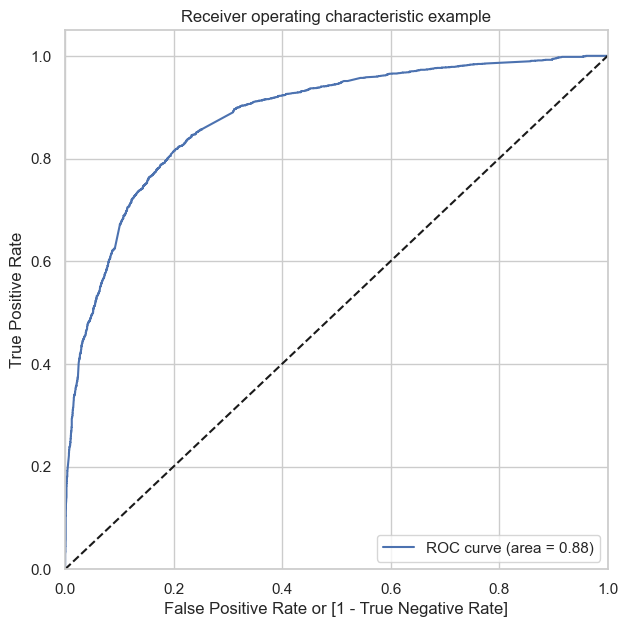

In [637]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Looking Optimal Cut off Point

In [638]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1871,0,0.256951,0,1,1,1,0,0,0,0,0,0,0
1,6795,0,0.224637,0,1,1,1,0,0,0,0,0,0,0
2,3516,0,0.299579,0,1,1,1,0,0,0,0,0,0,0
3,8105,0,0.816305,1,1,1,1,1,1,1,1,1,1,0
4,3934,0,0.126115,0,1,1,0,0,0,0,0,0,0,0


In [639]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.581323  0.972830  0.340080
0.2   0.2  0.745207  0.912409  0.642179
0.3   0.3  0.798701  0.835361  0.776112
0.4   0.4  0.813234  0.758719  0.846827
0.5   0.5  0.814780  0.696675  0.887556
0.6   0.6  0.795609  0.591646  0.921289
0.7   0.7  0.780303  0.509732  0.947026
0.8   0.8  0.762678  0.424574  0.971014
0.9   0.9  0.714595  0.269667  0.988756


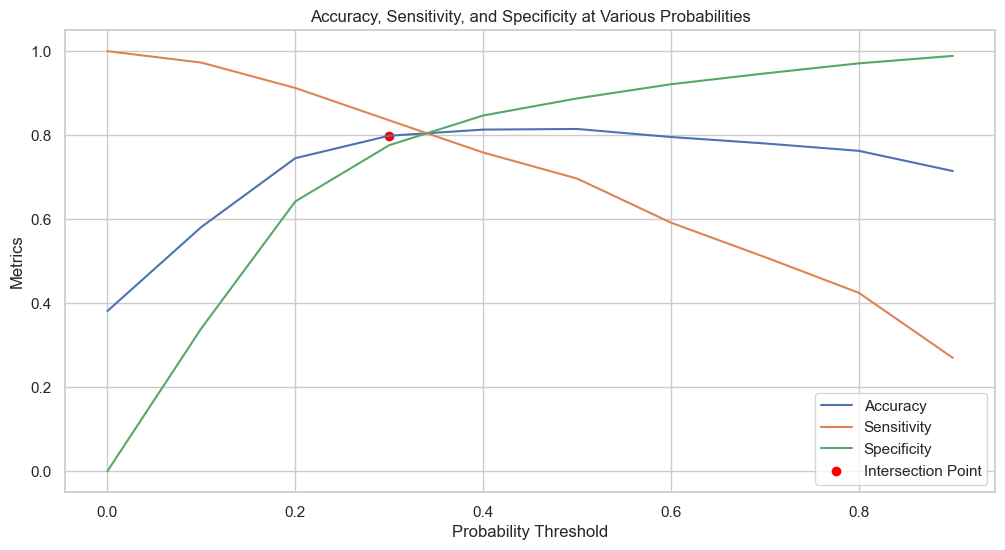

Intersection Point: (0.3, 0.7987012987012987)


In [640]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
# Calculate the Euclidean distance between the lines
cutoff_df['distance'] = np.sqrt((cutoff_df['accuracy'] - cutoff_df['sensi'])**2 +
                                (cutoff_df['accuracy'] - cutoff_df['speci'])**2 +
                                (cutoff_df['sensi'] - cutoff_df['speci'])**2)

# Find the index where the distance is minimized
intersection_idx = cutoff_df['distance'].idxmin()

# Get the coordinates of the intersection point
intersection_point = (cutoff_df.loc[intersection_idx, 'prob'], cutoff_df.loc[intersection_idx, 'accuracy'])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(cutoff_df['prob'], cutoff_df[['accuracy', 'sensi', 'speci']])
plt.scatter(*intersection_point, color='red', marker='o', label='Intersection Point')
plt.xlabel('Probability Threshold')
plt.ylabel('Metrics')
plt.legend(['Accuracy', 'Sensitivity', 'Specificity', 'Intersection Point'])
plt.title('Accuracy, Sensitivity, and Specificity at Various Probabilities')
plt.show()

print("Intersection Point:", intersection_point)

In [641]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1871,0,0.256951,0,1,1,1,0,0,0,0,0,0,0,0
1,6795,0,0.224637,0,1,1,1,0,0,0,0,0,0,0,0
2,3516,0,0.299579,0,1,1,1,0,0,0,0,0,0,0,0
3,8105,0,0.816305,1,1,1,1,1,1,1,1,1,1,0,1
4,3934,0,0.126115,0,1,1,0,0,0,0,0,0,0,0,0


In [642]:
#Assigning Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1871,0,0.256951,0,1,1,1,0,0,0,0,0,0,0,0,26
1,6795,0,0.224637,0,1,1,1,0,0,0,0,0,0,0,0,22
2,3516,0,0.299579,0,1,1,1,0,0,0,0,0,0,0,0,30
3,8105,0,0.816305,1,1,1,1,1,1,1,1,1,1,0,1,82
4,3934,0,0.126115,0,1,1,0,0,0,0,0,0,0,0,0,13


In [643]:
from sklearn.metrics import accuracy_score

In [644]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7987012987012987

In [645]:
confusion2 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3106,  896],
       [ 406, 2060]], dtype=int64)

In [646]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [647]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity of the logistic regression model is:  ",TP / float(TP+FN))

Sensitivity of the logistic regression model is:   0.8353609083536091


In [648]:
# Let us calculate specificity
print("Specificity of the logistic regression model is: ",TN / float(TN+FP))

Specificity of the logistic regression model is:  0.776111944027986


In [649]:
# Calculate false postive rate
print("False positive rate:",FP/ float(TN+FP))

# Positive predictive value 
print("Positive Predictive rate:",TP / float(TP+FP))

# Negative predictive value
print("Negative Predictive rate:",TN / float(TN+ FN))

False positive rate: 0.223888055972014
Positive Predictive rate: 0.6968876860622463
Negative Predictive rate: 0.8843963553530751


In [650]:
#classification report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted ))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      4002
           1       0.70      0.84      0.76      2466

    accuracy                           0.80      6468
   macro avg       0.79      0.81      0.79      6468
weighted avg       0.81      0.80      0.80      6468



In [651]:
from sklearn.metrics import precision_recall_curve

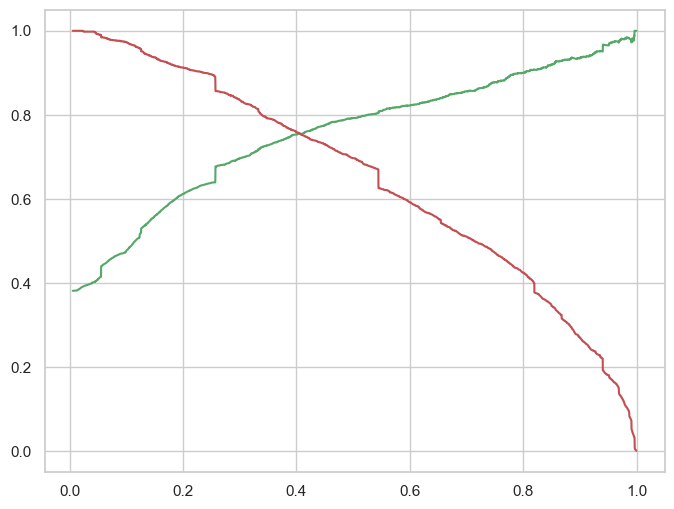

In [652]:
##precision or recall tradeoff
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.figure(figsize = (8,6))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

At the 0.4 threshold, a balance exists between Precision and Recall. Therefore, it's prudent to categorize any Prospect Lead with a Conversion Probability exceeding 40% as a promising Lead.

### Making predictions on the test set

In [655]:
y_test = df_test.pop('Converted')
X_test = df_test

In [656]:
#Making predictions on the test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
4269,0,0,0.857967,0.964504,2.613424,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2376,0,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7766,0,0,0.290067,-0.777416,1.226321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9199,0,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4359,0,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [658]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4269,0,0.964504,0,0,0,0,1,0,0,1,0,0,0
2376,0,-0.885371,1,0,0,0,1,0,0,1,0,0,0
7766,0,-0.777416,0,0,0,0,0,0,0,0,0,0,1
9199,0,-0.885371,0,1,0,1,0,0,0,1,0,1,0
4359,0,-0.885371,1,0,0,0,0,0,0,1,0,0,0


In [659]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [660]:
#Making Predicition on test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.741222
2376    0.940091
7766    0.910415
9199    0.055546
4359    0.819475
9186    0.562713
1631    0.454127
8963    0.157357
8007    0.083211
5324    0.342030
dtype: float64

In [661]:
# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_test_pred)

In [662]:
# Let's see the head
y_pred_df.head()

,0
4269,0.741222
2376,0.940091
7766,0.910415
9199,0.055546
4359,0.819475


In [663]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Lead ID'] = y_test_df.index

In [664]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [665]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,Lead ID,0
0,1,4269,0.741222
1,1,2376,0.940091
2,1,7766,0.910415
3,0,9199,0.055546
4,1,4359,0.819475


In [666]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [668]:
# Rearranging the columns
desired_order = ['Lead ID', 'Converted', 'Converted_prob']
y_pred_final = y_pred_final.reindex(columns=desired_order)


In [669]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead ID,Converted,Converted_prob
0,4269,1,0.741222
1,2376,1,0.940091
2,7766,1,0.910415
3,9199,0,0.055546
4,4359,1,0.819475


In [670]:
# Creating new column "Lead Score" with 1to100 using conversion rates
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
# Let's see the head
y_pred_final.head()

,Lead ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.741222,74
1,2376,1,0.940091,94
2,7766,1,0.910415,91
3,9199,0,0.055546,6
4,4359,1,0.819475,82


In [671]:
#Taking 0.4 as the cutoff using precision recall tradeoff
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

In [672]:
y_pred_final.head()

,Lead ID,Converted,Converted_prob,Lead_Score,final_predicted
0,4269,1,0.741222,74,1
1,2376,1,0.940091,94,1
2,7766,1,0.910415,91,1
3,9199,0,0.055546,6,0
4,4359,1,0.819475,82,1


In [673]:
# Let's check the overall accuracy.
print("Model Accuracy on Test data is ",accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Model Accuracy on Test data is  0.8181818181818182


In [674]:
confusion2 = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1433,  244],
       [ 260,  835]], dtype=int64)

In [675]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [676]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity of the model on test data is:",TP / float(TP+FN))

Sensitivity of the model on test data is: 0.7625570776255708


In [677]:
# Let us calculate specificity
print("Specificity of the model on test data is:",TN / float(TN+FP))

Specificity of the model on test data is: 0.8545020870602266


In [678]:
#classification report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1677
           1       0.77      0.76      0.77      1095

    accuracy                           0.82      2772
   macro avg       0.81      0.81      0.81      2772
weighted avg       0.82      0.82      0.82      2772

